In [1]:
import pandas as pd

from prophet import Prophet

df = pd.read_csv(r'C:\Users\xbox1\OneDrive - Angelo State University\Documents\CS4306\barrios-1\iss-data\csv\test\us_rs_weekly_consumbale_gas_summary_2.csv')

df.columns = ['ds', 'y']
df.head()

c:\Users\xbox1\OneDrive - Angelo State University\Documents\CS4306\barrios-1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ds,y
0,2022-01-02,175.57
1,2022-01-09,175.57
2,2022-01-16,175.57
3,2022-01-23,175.57
4,2022-01-30,172.59


In [2]:
m = Prophet()
m.fit(df)

21:31:10 - cmdstanpy - INFO - Chain [1] start processing
21:31:11 - cmdstanpy - INFO - Chain [1] done processing


In [3]:
# makes dataframe in the future 365 days
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
448,2024-08-29
449,2024-08-30
450,2024-08-31
451,2024-09-01
452,2024-09-02


In [4]:
#forcasting
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
448,2024-08-29,194.516962,167.987662,220.733603
449,2024-08-30,194.493355,169.269758,219.196723
450,2024-08-31,194.469747,168.939309,220.724115
451,2024-09-01,194.446140,171.631719,219.914525
452,2024-09-02,194.422532,168.480373,220.301056


c:\Users\xbox1\OneDrive - Angelo State University\Documents\CS4306\barrios-1\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\xbox1\OneDrive - Angelo State University\Documents\CS4306\barrios-1\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


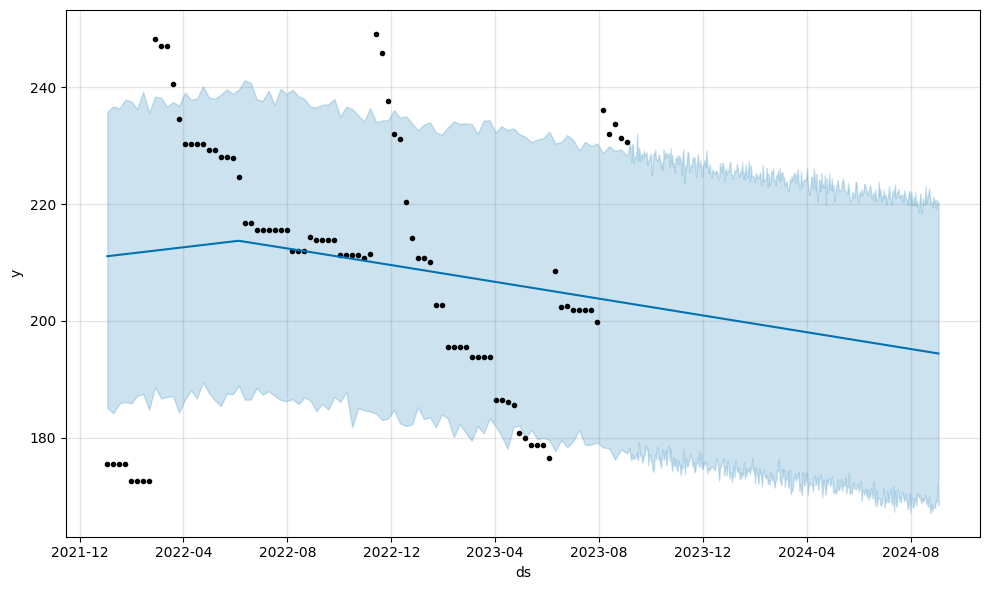

In [5]:
#plot
fig1 = m.plot(forecast)